# **Overview**
 Para resolver esse desafio técnico, irei utilizar o framework **CRISP-DM** para garantir que a análise seja estruturada, repetível e orientada a resultados. Seguindo os passos:

1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral deles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (análise exploratória de dados).

5. Engenharia de features, limpeza e pré-processamento dos dados.

6. Treinamento de modelos, comparação, seleção de features e ajuste de hiperparâmetros.

7. Teste e avaliação do modelo final de produção.

8. Concluir e interpretar os resultados do modelo.

9. Deploy do modelo.

# **1. Problema de Negócio**

Uma empresa de telecomunicações está enfrentando problemas de: Churn elevado (indicando perda significativa de clientes e impacto direto na receita) e NPS abaixo do esperado (refletindo baixa satisfação e lealdade dos clientes).

O principal produto da empresa possui alto custo de instalação (setup), o que torna cada perda de cliente **especialmente onerosa**.
Diante disso, buscou-se uma estratégia robusta, orientada por dados e centrada na experiência do cliente, com foco em **retenção** e **fidelização**.

Retenção de clientes: é a capacidade de uma empresa manter clientes existentes por mais tempo, evitando que eles deixem a marca ou serviço.

Foco: Reduzir o churn, ou seja, a taxa de cancelamento ou perda de clientes.


Fidelização de clientes: é o processo de criar um vínculo emocional ou de confiança com o cliente, fazendo com que ele escolha sempre a sua marca, mesmo que existam opções concorrentes.

Foco: Transformar clientes em promotores da marca e aumentar o valor do ciclo de vida do cliente.

### **Imports the libreries**

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
import sys
sys.path.append('../src')
from utils import *

# Debugging.
# from src.exception import CustomException # Removed the problematic import
import sys

# Warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module='matplotlib')

# Formatação de Números Decimais
pd.options.display.float_format = '{:.2f}'.format

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33', '#8ecae6', '#ffb703']
palette_Churn = color_palette[0:2]
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2),
 (0.5568627450980392, 0.792156862745098, 0.9019607843137255),
 (1.0, 0.7176470588235294, 0.011764705882352941)]

**utils**

# **2. Understanding the data**



df_nps

In [2]:
df_nps = pd.read_csv('../data/01_raw/customer_nps.csv')
display(df_nps.head())

print("\n" + "="*50)
df_nps.info()

print("\n" + "="*50)
print(f'The dataset has {df_nps.shape[0]} rows and {df_nps.shape[1]} columns.')

,cpf,NPS
0,10433218100,9
1,96001338914,9
2,8386379499,9
3,2654235114,8
4,16155940789,9



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cpf     7234 non-null   int64
 1   NPS     7234 non-null   int64
dtypes: int64(2)
memory usage: 113.2 KB

The dataset has 7234 rows and 2 columns.


df_original

In [3]:
df_original = pd.read_csv('../data/01_raw/customer_original.csv')
display(df_original.head())

print("\n" + "="*50)
df_original.info()

print("\n" + "="*50)
print(f'The dataset has {df_original.shape[0]} rows and {df_original.shape[1]} columns.')

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,104.332.181-00
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,960.013.389-14
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,083.863.794-99
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,026.542.351-14
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,161.559.407-89



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 

df_social

In [4]:
df_social = pd.read_csv('../data/01_raw/customer_social.csv')
display(df_social.head())

print("\n" + "="*50)
df_social.info()

print("\n" + "="*50)
print(f'The dataset has {df_social.shape[0]} rows and {df_social.shape[1]} columns.')

,cpf,gender,SeniorCitizen,Partner,Dependents
0,10433218100,Female,0,Yes,Yes
1,96001338914,Female,0,No,No
2,8386379499,Female,0,Yes,No
3,2654235114,Female,0,No,No
4,16155940789,Male,0,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cpf            7234 non-null   int64 
 1   gender         7234 non-null   object
 2   SeniorCitizen  7234 non-null   int64 
 3   Partner        7234 non-null   object
 4   Dependents     7234 non-null   object
dtypes: int64(2), object(3)
memory usage: 282.7+ KB

The dataset has 7234 rows and 5 columns.


In [5]:
#Verificando valores repetidos para o join key 'cpf'

print(f"Quantidade de CPFs duplicados em df_nps: {df_nps.duplicated(subset=['cpf']).sum()}")
print(f"Quantidade de CPFs duplicados em df_original: {df_original.duplicated(subset=['cpf']).sum()}")
print(f"Quantidade de CPFs duplicados em df_social: {df_social.duplicated(subset=['cpf']).sum()}")


Quantidade de CPFs duplicados em df_nps: 169
Quantidade de CPFs duplicados em df_original: 169
Quantidade de CPFs duplicados em df_social: 169


###**Conclusions**:

The same number of records (7,234 records) was identified in originals datasets, with the presence of 169 duplicates. Assuming `df_original` represents a unique customer registry, these duplicates were classified as noise, resulting in a final base of **7,065 unique records** for the analysis.

The analysis revealed the **absence of null values (NaN)** in all datasets. This condition streamlines the preprocessing phase, as it does not require the application of data imputation techniques.

**Join Key (`cpf`) Inconsistency:**

The main impediment to data integration was the type discrepancy in the `cpf` key. The column was presented as `object` in `df_original` and `int64` in the others; in addition to the presence of symbols. Além disso foi percebido que df_original contém símbolos, df_nps e df_social contém registros sem o primeiro zero. These inconsistencies make the *merge* operation impossible and require handling.

**Datasets:**

* **df_original:** Contains customer service, contract, and billing *features*, including the **`Churn` target variable**.
* **df_nps:** Maps each customer (`cpf`) to their respective **Net Promoter Score (`NPS`) metric**.
* **df_social:** Aggregates the customer's **demographic attributes**, such as gender, seniority, partner, and dependents.

Para contextualizar a análise, o primeiro passo foi a criação de um dicionário de dados. Como este não foi fornecido, a construção iniciou-se pela inferência lógica dos nomes das colunas e pela análise de seus valores únicos.

Esse processo inicial permitiu identificar que o schema do dataset é diretamente compatível com o conhecido benchmark do setor, o 'Telco Customer Churn' (disponível em: https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). Essa referência, aliada à validação contínua pelos valores de cada coluna, forneceu uma base confiável para definir cada feature e guiar as etapas seguintes da análise.

### **Data dictionary**


**cpf:** Número de identificação do cliente (pode ser útil para unir com outros dataframes).

**NPS:** Net Promoter Score, uma métrica que indica a satisfação e lealdade do cliente. Valores mais altos geralmente indicam maior satisfação.

**tenure:** Tempo que o cliente permaneceu com a empresa (em meses).

**PhoneService:** Indica se o cliente tem serviço telefônico (Yes/No).

**MultipleLines:** Indica se o cliente tem múltiplas linhas telefônicas (Yes/No/No phone service).

**InternetService:** Tipo de serviço de internet do cliente (DSL/Fiber optic/No).

**OnlineSecurity:** Indica se o cliente tem serviço de segurança online (Yes/No/No internet service).

**OnlineBackup:** Indica se o cliente tem serviço de backup online (Yes/No/No internet service).

**DeviceProtection:** Indica se o cliente tem proteção de dispositivo (Yes/No/No internet service).

**TechSupport:** Indica se o cliente tem suporte técnico (Yes/No/No internet service).

**StreamingTV:** Indica se o cliente tem serviço de streaming de TV (Yes/No/No internet service).

**StreamingMovies:** Indica se o cliente tem serviço de streaming de filmes (Yes/No/No internet service).

**Contract:** Tipo de contrato do cliente (Month-to-month/One year/Two year).

**PaperlessBilling:** Indica se o cliente tem faturamento sem papel (Yes/No).

**PaymentMethod:** Método de pagamento do cliente.

**MonthlyCharges:** Valor cobrado do cliente mensalmente.

**TotalCharges:** Valor total cobrado do cliente.

**Churn:** Indica se o cliente cancelou o serviço (Yes/No).

**gender:** Gênero do cliente (Female/Male).

**SeniorCitizen:** Indica se o cliente é um cidadão sênior (0/1).

**Partner:** Indica se o cliente tem um parceiro (Yes/No).

**Dependents:** Indica se o cliente tem dependentes (Yes/No).

### **Merge Process**

In [6]:
# Remove duplicate rows from all dataframes e cria cópias independentes
df_original = df_original.drop_duplicates(subset=['cpf']).copy()
df_nps = df_nps.drop_duplicates(subset=['cpf']).copy()
df_social = df_social.drop_duplicates(subset=['cpf']).copy()

# Limpa e converte para df_original
df_original['cpf'] = df_original['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_original['cpf'] = df_original['cpf'].astype('int64')

# Limpa e converte para df_nps
df_nps['cpf'] = df_nps['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_nps['cpf'] = df_nps['cpf'].astype('int64')

# Limpa e converte para df_social
df_social['cpf'] = df_social['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_social['cpf'] = df_social['cpf'].astype('int64')

In [7]:
df_merged = df_original.merge(df_nps, on='cpf', how='left')
df_merged = df_merged.merge(df_social, on='cpf', how='left')

print("Merged DataFrame Info:")
df_merged.info()

#Looking at dataset general information.
print("\n" + "="*50)
df_merged.duplicated().sum()

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7065 non-null   int64  
 1   PhoneService      7065 non-null   object 
 2   MultipleLines     7065 non-null   object 
 3   InternetService   7065 non-null   object 
 4   OnlineSecurity    7065 non-null   object 
 5   OnlineBackup      7065 non-null   object 
 6   DeviceProtection  7065 non-null   object 
 7   TechSupport       7065 non-null   object 
 8   StreamingTV       7065 non-null   object 
 9   StreamingMovies   7065 non-null   object 
 10  Contract          7065 non-null   object 
 11  PaperlessBilling  7065 non-null   object 
 12  PaymentMethod     7065 non-null   object 
 13  MonthlyCharges    7065 non-null   float64
 14  TotalCharges      7065 non-null   float64
 15  Churn             7065 non-null   object 
 16  cpf               7

0

A validação pós-merge confirma a integridade e completude do dataset. A base de dados contém 7.065 registros, correspondendo a clientes únicos, sem dados ausentes em nenhuma das 22 features. A tipagem das variáveis está consistente com seus respectivos domínios (numérico, categórico).

In [8]:
# Definindo a coluna 'cpf' como o novo índice do DataFrame
df_merged = df_merged.set_index('cpf')
df_merged.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS,gender,SeniorCitizen,Partner,Dependents
cpf,,,,,,,,,,,,,,,,,,,,,
10433218100,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.75,8672.45,No,9,Female,0,Yes,Yes
96001338914,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.65,8477.60,No,9,Female,0,No,No
8386379499,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Mailed check,118.60,7990.05,No,9,Female,0,Yes,No
2654235114,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.60,7365.70,No,8,Female,0,No,No
16155940789,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.35,7804.15,Yes,9,Male,0,No,No


In [9]:
df_merged.to_csv('../data/02_processed/df_merged.csv', index=False)
print("DataFrame df_merged salvo como '../data/02_processed/df_merged.csv'")

DataFrame df_merged salvo como '../data/02_processed/df_merged.csv'


### Direcionamento Estratégico

O desafio apresentado envolve dois indicadores fundamentais para a empresa: Churn e NPS. Ambos impactam a sustentabilidade do negócio, mas de maneiras distintas. Para definir o direcionamento estratégico, foram considerados três critérios principais: impacto para o negócio, viabilidade de atuação e potencial de melhoria.

1. Impacto para o negócio
O churn elevado gera perdas financeiras imediatas, uma vez que cada cliente perdido representa não apenas a redução da receita recorrente, mas também o desperdício do alto custo de instalação do serviço. Já o NPS reflete a satisfação e a lealdade dos clientes, sendo essencial para a fidelização no longo prazo. No entanto, seu impacto é indireto e de difícil mensuração em curto prazo, além de estar sujeito a interpretações individuais. Dois clientes podem atribuir a mesma nota de forma distinta (por exemplo, uma nota 5 para um pode significar indiferença, enquanto para outro representa forte insatisfação), o que torna o indicador mais subjetivo e menos consistente para guiar ações imediatas.

2. Viabilidade de atuação
A base de dados disponibilizada contém variáveis fortemente associadas à propensão ao cancelamento, como tenure, Contract, PaymentMethod, PaperlessBilling, MonthlyCharges e TotalCharges. Essas variáveis permitem a construção de modelos preditivos consistentes, com alta capacidade de identificar clientes em risco e apoiar ações de retenção direcionadas. Já no caso do NPS, embora existam variáveis que influenciam a percepção de valor (OnlineSecurity, TechSupport, StreamingTV, entre outras), a relação é menos direta e mais difícil de traduzir em ações preditivas baseadas nos dados disponíveis.

3. Potencial de melhoria
A redução do churn apresenta alto potencial de melhoria, pois há oportunidades claras de intervenção: campanhas específicas para clientes em contratos mensais, incentivos para clientes recém-adquiridos, ajustes de preços ou benefícios para clientes com altos gastos mensais. Já o NPS, embora fundamental para a fidelização, depende de iniciativas estruturais de médio e longo prazo, como a melhoria na qualidade percebida do serviço e no suporte técnico, que exigem maior investimento e tempo para gerar impacto, além de estar sujeito a variações subjetivas de avaliação por parte dos clientes.

Diante dessa análise, o churn será adotado como indicador central da estratégia, por apresentar maior impacto financeiro imediato, maior viabilidade de atuação com base nos dados disponíveis e alto potencial de melhoria por meio de ações práticas e mensuráveis.

O NPS será acompanhado como indicador complementar, servindo para mapear os fatores de insatisfação e orientar melhorias estruturais que reforcem a fidelização no médio e longo prazo. Dessa forma, a estratégia equilibra ações de curto prazo voltadas à retenção com iniciativas de longo prazo orientadas à experiência do cliente.

# **3. Split the data into train and test sets**

First of all, I will split the data into train and test sets.

Test set is supposed to be data the model has never seen before.

I will perform EDA focusing on the training set in order to avoid data leakage, get a realistic representation and evaluate the model correctly with new unseen data.

I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, which is the case, as there are more existing customers than attrited ones.

In [10]:
df_merged.columns

Index(['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'NPS',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [11]:
X = df_merged.drop(columns=['Churn'])
y = df_merged['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (5652, 20).
Train target dataset shape: (5652,).
Test predictor dataset shape: (1413, 20).
Test target dataset shape: (1413,).


In [13]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64

Test target proportion: 
Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64


The target classes proportions were preserved.

# **4. Exploratory data analysis (EDA)**

I will explore the training set in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights from the data, especially regard to the target variable (Churn). Thus, I will do univariate, bivariate and multivariate analysis of the data.

I will get an entire train set (with predictor and target features) in order to use seaborn 'hue' parameter for visualizations and look at the correlation matrix.

In [14]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NPS,gender,SeniorCitizen,Partner,Dependents,Churn
cpf,,,,,,,,,,,,,,,,,,,,,
48124211442,68,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Credit card (automatic),85.00,5607.75,10,Female,0,Yes,Yes,No
50968832725,38,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,...,No,Bank transfer (automatic),91.70,3479.05,7,Male,0,Yes,No,No
74028265622,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,No,Mailed check,20.40,42.90,8,Male,0,No,Yes,No
48962980550,9,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,Yes,Bank transfer (automatic),77.65,714.15,3,Female,0,No,No,Yes
95612667841,62,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,...,Yes,Credit card (automatic),72.00,4284.20,10,Female,0,Yes,No,No


I will create separate lists for categorical, numerical, and target features in order to analyze the data separately.

In [15]:
numerical_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

target = 'Churn'

print(f'Existem {len(numerical_features)} features numéricas. São elas: ')
print(numerical_features)
print(f'\nExistem {len(categorical_features)} features categóricas. São elas: ')
print(categorical_features)
print(f'\nA feature alvo (target) é: {target}.')

Existem 3 features numéricas. São elas: 
['tenure', 'MonthlyCharges', 'TotalCharges']

Existem 16 features categóricas. São elas: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

A feature alvo (target) é: Churn.


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [16]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df_train[feature].nunique()} unique values. They are: ')
    print(df_train[feature].value_counts(normalize=True))
    print()

gender
----------------------------------------
There are 2 unique values. They are: 
gender
Male     0.51
Female   0.49
Name: proportion, dtype: float64

SeniorCitizen
----------------------------------------
There are 2 unique values. They are: 
SeniorCitizen
0   0.84
1   0.16
Name: proportion, dtype: float64

Partner
----------------------------------------
There are 2 unique values. They are: 
Partner
No    0.52
Yes   0.48
Name: proportion, dtype: float64

Dependents
----------------------------------------
There are 2 unique values. They are: 
Dependents
No    0.71
Yes   0.29
Name: proportion, dtype: float64

PhoneService
----------------------------------------
There are 2 unique values. They are: 
PhoneService
Yes   0.90
No    0.10
Name: proportion, dtype: float64

MultipleLines
----------------------------------------
There are 3 unique values. They are: 
MultipleLines
No                 0.48
Yes                0.42
No phone service   0.10
Name: proportion, dtype: float64

Inte

* A variável Contract aprentou ordem natural entre as categorias (Month-to-month < One year < Two year). Por isso, será aplicado Ordinal Encoding com o mapeamento: {"Month-to-month": 0, "One year": 1, "Two year": 2} na etapa de Pré-Processamento.

* As demais variáveis categóricas não apresentaram hierarquia, por isso serão tratadas com One-Hot Encoding para evitar a criação de relações artificiais entre categorias nominais.


### **Univariate analysis**
I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

### **Target distribution**

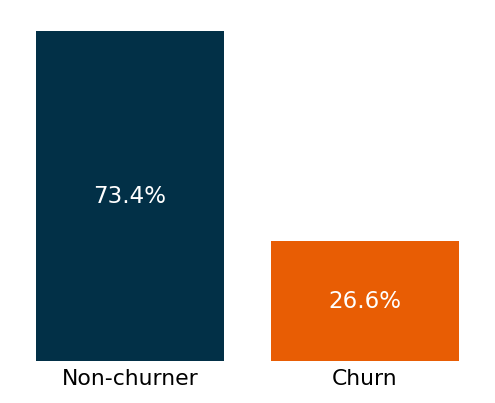

In [17]:
order = ['No', 'Yes']
counts = df_train['Churn'].value_counts().loc[order] # Garante a ordem correta

palette = ['#023047', '#e85d04']
labels_map = ['Non-churner', 'Churn']
fig, ax = plt.subplots(figsize=(4, 3))

bars = ax.bar(counts.index, counts.values, color=palette)

total = len(df_train)
bar_labels = [f'{(h / total) * 100:.1f}%' for h in counts.values]
ax.bar_label(bars, labels=bar_labels, color='white', fontsize=11, label_type='center')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(ticks=range(len(order)), labels=labels_map, fontsize=10.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.get_yaxis().set_visible(False)
ax.grid(False)

plt.show()

The target is imbalanced. 26.6% of the customers are churners. Thus, I will adopt some strategies in order to deal with this. They are:

Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.
Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a churner customer. These weights are defined on the model specific hyperparameter for it.
Take a look at precision-recall trade-off if necessary. The main objective here is to predict churn probabilities, not a binary prediction. This will enable the telecommunication company to make better informed decisions. Instead of simply assessing if a client will attrit or not, it can check how likely he is to skip the service.

### **Numeric Feature Distributions**
I will analyze the numeric feature distributions below to determine if there are any skewed distributions and what the most common values are for the numeric attributes of the telecommunications company's customers.

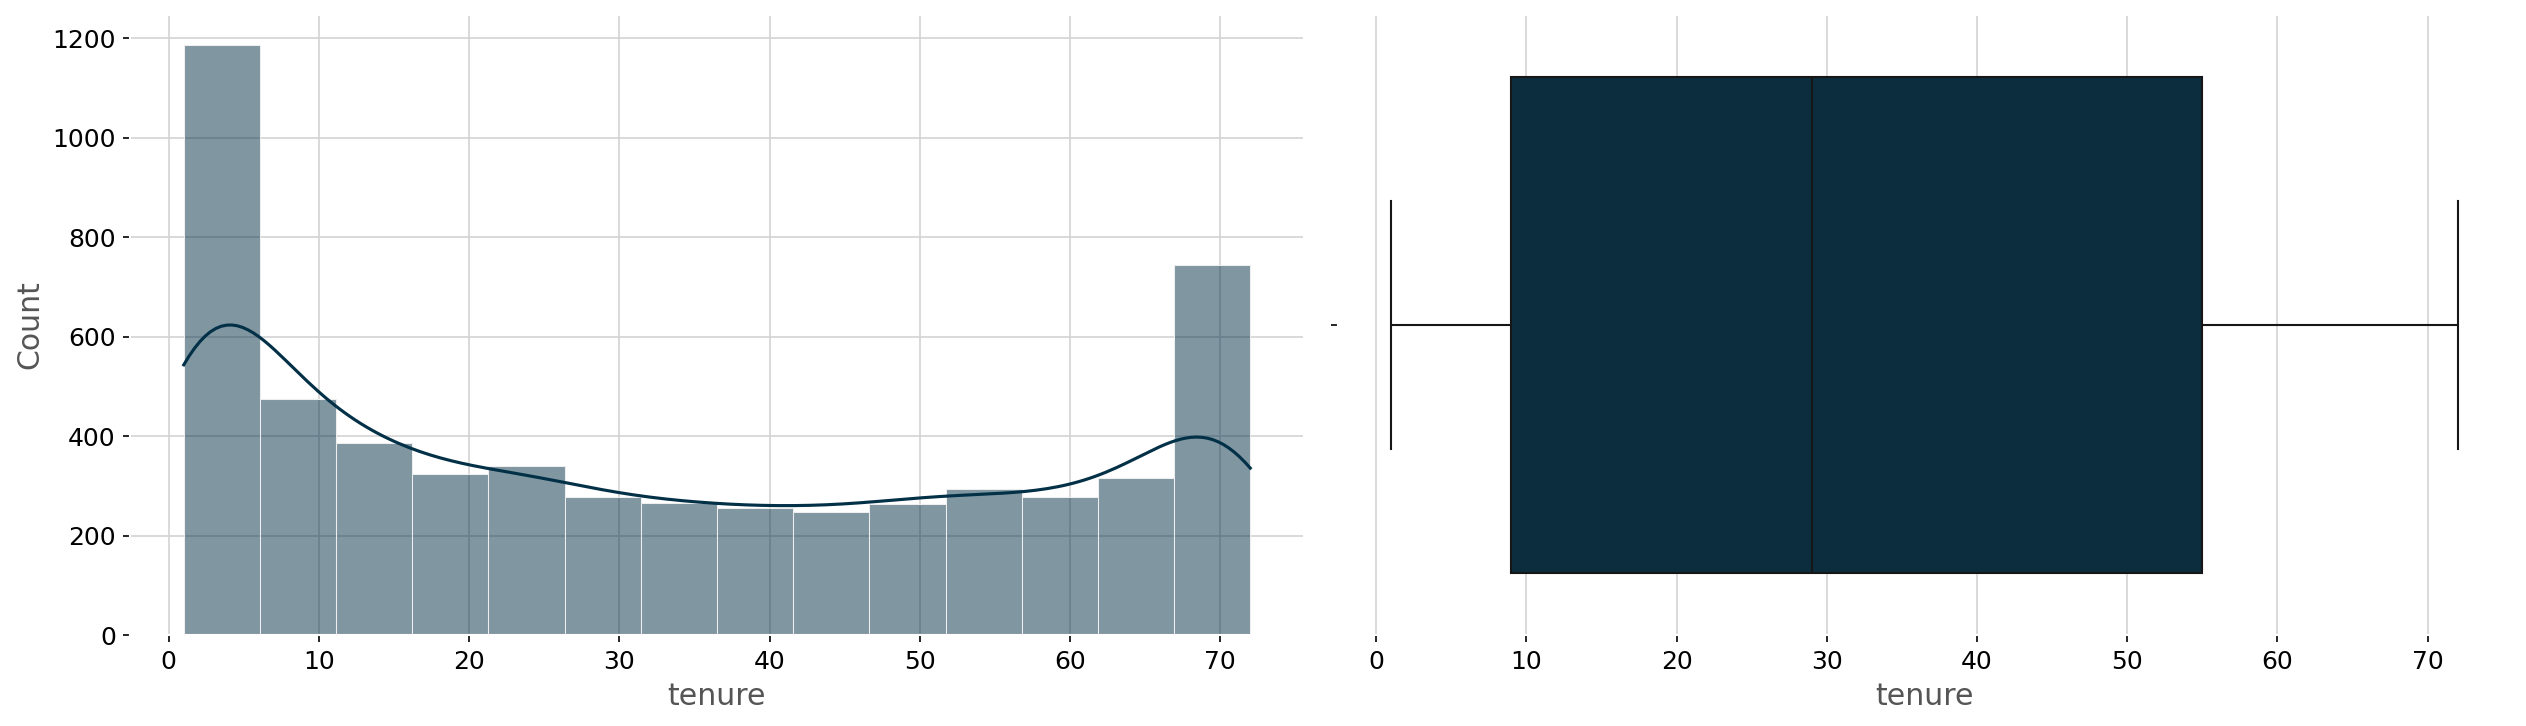

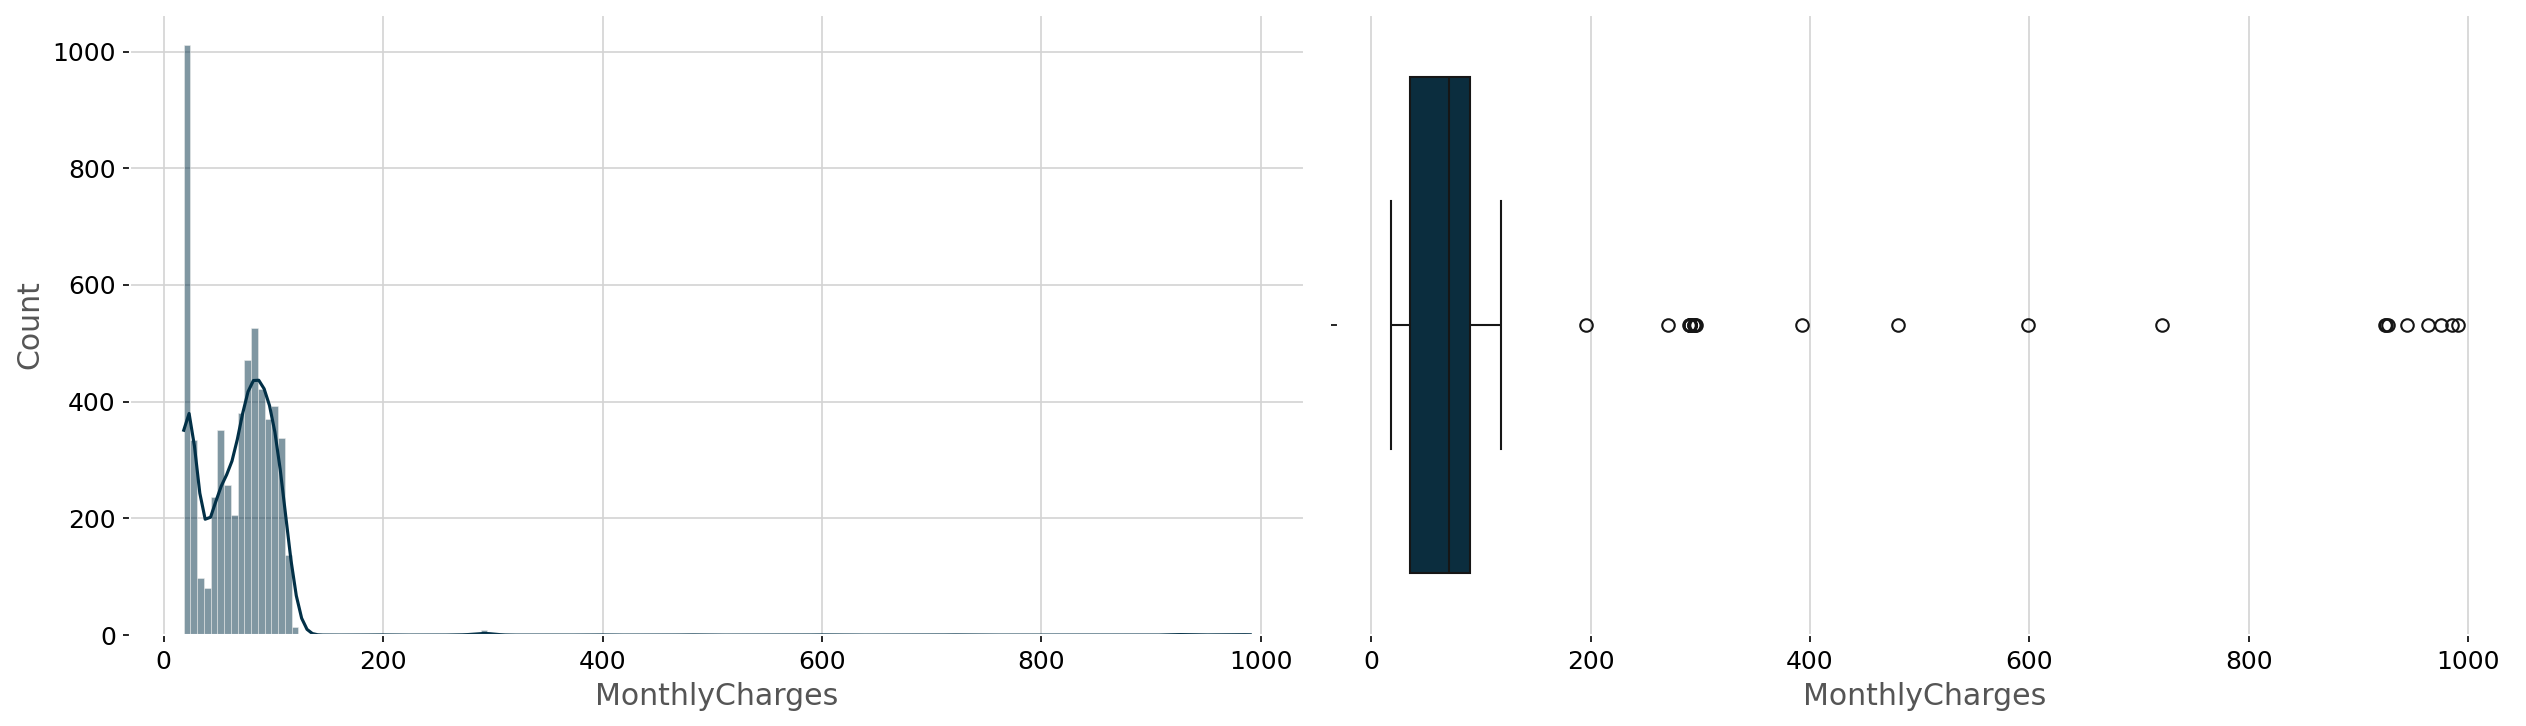

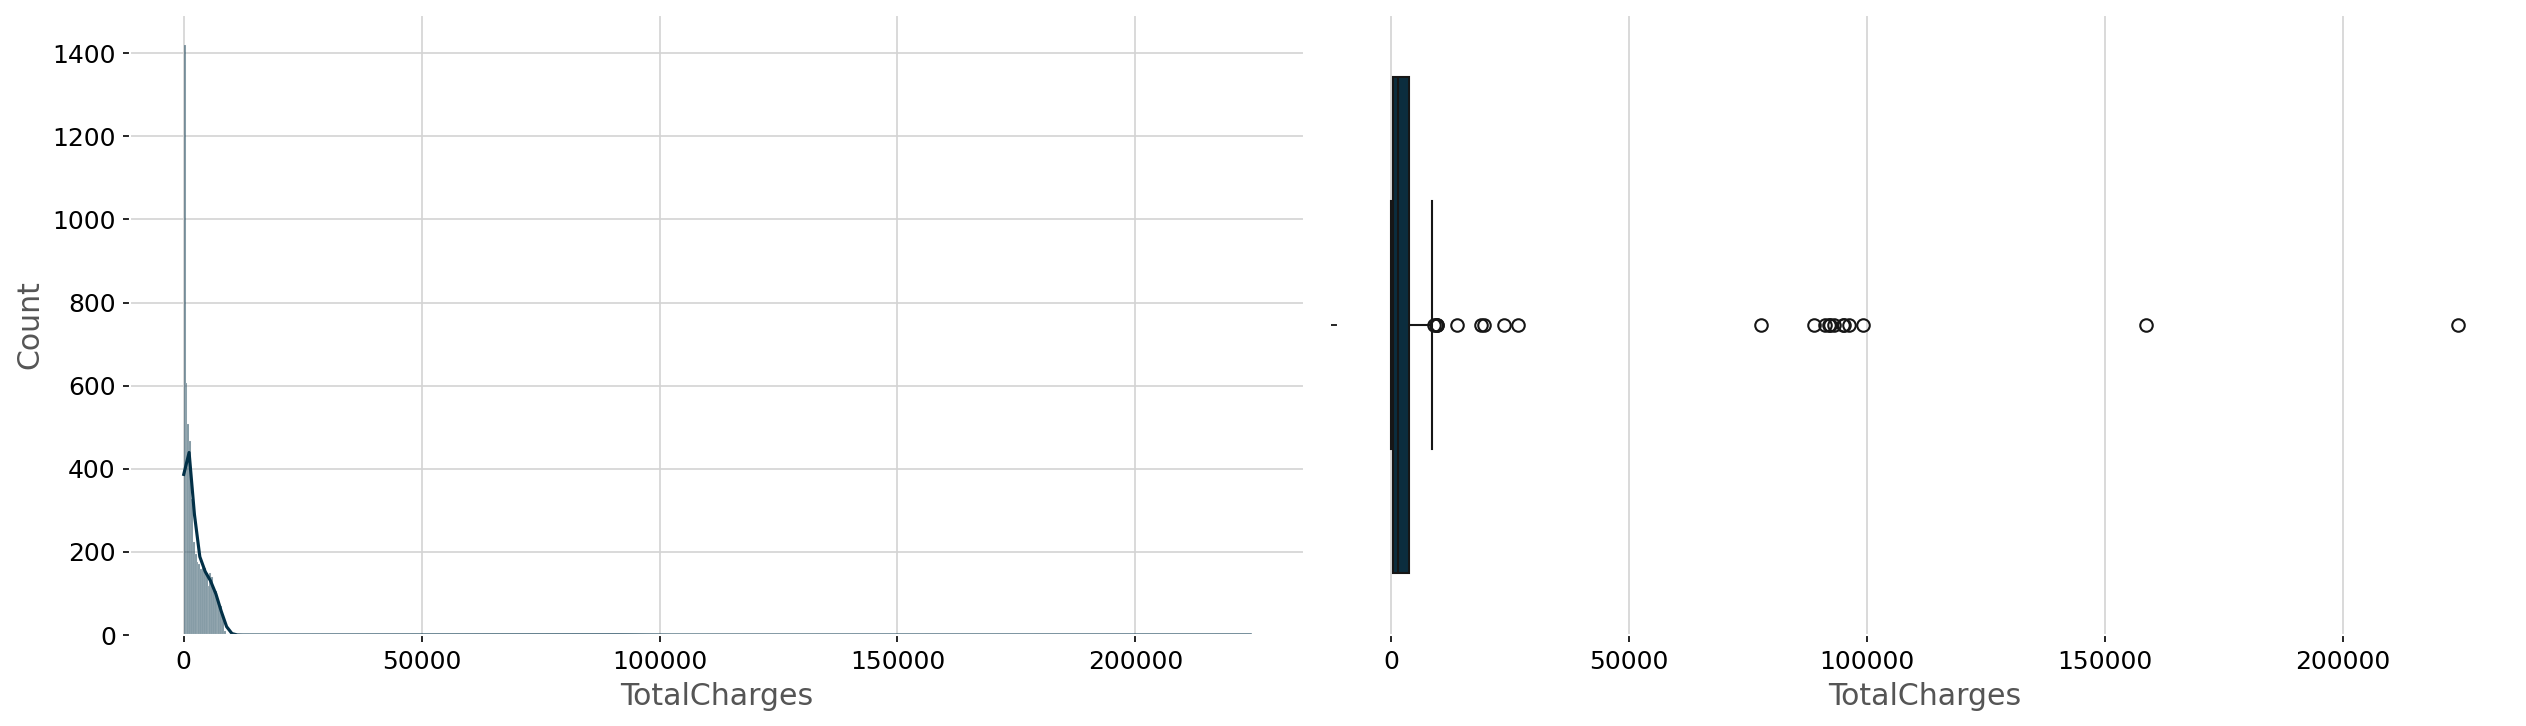

In [18]:
for feature in numerical_features:
    fig, axes = plot_histogram_outliers_inline(feature, df_train)
    plt.tight_layout()
    plt.show()

INSIGHTS:
* A distribuição do tempo de contrato (tenure) indica dois grupos em destaque: clientes recentes e de longa data. Isso pode sugerir que a empresa tem uma alta taxa de cancelamento (churn) nos estágios iniciais, mas aqueles que superam essa fase tendem a permanecer.
* A cobrança mensal (MonthlyCharges) apresentou um distribuição com dois picos de arrecadação. Essa divisão pode representar dois segmentos de clientes distintos: um que consome um serviço de entrada (talvez apenas telefonia) e outro que adquire pacotes mais completos (internet, streaming, etc.).
* As cobranças totais (TotalCharges) são fortemente assimétricas à direita. Isso significa que a grande maioria dos clientes acumulou um valor baixo de cobranças totais, o que é consistente com a grande quantidade de novos clientes vista no gráfico de tenure. A receita total da empresa parece ser impulsionada por uma minoria de clientes de longo prazo, que formam a "cauda longa" da distribuição e representam os valores mais altos.

### **Outliers**

Agora, avaliarei os outliers são dados ruidosos ou podem ser informativos na análise.

In [19]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df_train, features=numerical_features)

INFO:utils:Existem 45 outliers no dataset.
INFO:utils:Número (percentual) de outliers por feature:
INFO:utils:tenure: 0 (0.0%)
INFO:utils:MonthlyCharges: 24 (0.42%)
INFO:utils:TotalCharges: 21 (0.37%)


In [20]:
# Calcula o valor esperado
df_train["Expected_Total"] = df_train["tenure"] * df_train["MonthlyCharges"]

# Define tolerância de 20%
tolerance = 0.2
df_train["Within_Tolerance"] = (
    (df_train["TotalCharges"] >= (1 - tolerance) * df_train["Expected_Total"]) &
    (df_train["TotalCharges"] <= (1 + tolerance) * df_train["Expected_Total"])
)

# Marca valores 20x acima do esperado
df_train["Above_100x"] = df_train["TotalCharges"] >= 20 * df_train["Expected_Total"]

# Contagem de registros
total = len(df_train)
count_within_tolerance = df_train["Within_Tolerance"].sum()
count_above_20x = df_train["Above_100x"].sum()

# Percentuais
perc_within_tolerance = (count_within_tolerance / total) * 100
perc_above_20x = (count_above_20x / total) * 100

# Saída final
print(f"1. Dentro de 20% do esperado: {count_within_tolerance} registros ({perc_within_tolerance:.2f}%)")
print(f"2. 20x acima do esperado: {count_above_20x} registros ({perc_above_20x:.4f}%)\n")

# Exibe linhas 20x acima do esperado
if count_above_20x > 0:
    print("Registros com TotalCharges >= 20x Expected_Total:")
    print(df_train[df_train["Above_100x"]][["tenure", "MonthlyCharges", "TotalCharges", "Expected_Total"]].head())


1. Dentro de 20% do esperado: 5581 registros (98.74%)
2. 20x acima do esperado: 3 registros (0.0531%)

Registros com TotalCharges >= 20x Expected_Total:
             tenure  MonthlyCharges  TotalCharges  Expected_Total
cpf                                                              
62494514719       8          195.65      77778.10         1565.20
88307053499       9          294.05      88811.65         2646.45
20410372883       7           20.05      99164.85          140.35


Apesar das proporções de valores discrepantes serem baixas, foi verificada uma inconsistência nas informações entre o valor cobrado esperado de um cliente pelo seu tempo de permanência e valor mensal cobrado, com relação ao valor total cobrado. A análise revelou que em 98.74% o valor total cobrado estava dentro de uma tolerância de 20% do valor mensal cobrado pelo tempo de permanência, enquanto 3 registros estiveram 20x acima do esperado, o que demonstra claramente a existência de dados ruidosos.

 Assim valores fora do intervalo quartil foram considerados ruidosos e serão removidos na etapa de data cleaning.

### **Outliers Processing (Data Cleaning)**

In [21]:
features = ["MonthlyCharges", "TotalCharges"]  # Coloque as features que deseja checar
outlier_indexes, outlier_counts, total_outliers = check_outliers(X_train, features)

INFO:utils:Existem 45 outliers no dataset.
INFO:utils:Número (percentual) de outliers por feature:
INFO:utils:MonthlyCharges: 24 (0.42%)
INFO:utils:TotalCharges: 21 (0.37%)


In [22]:
# Conjunto de todos os índices de outliers em todas as features
all_outlier_indexes = set()
for idx_list in outlier_indexes.values():
    all_outlier_indexes.update(idx_list)

# Cria um novo DataFrame sem os outliers
df_clean = df_train.drop(index=all_outlier_indexes)
df_train = df_clean.copy()

print(f"Original dataset size: {len(df_train)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Total outliers removed: {len(all_outlier_indexes)}")


Original dataset size: 5627
Cleaned dataset size: 5627
Total outliers removed: 25


### **Categorical features distributions**

In [23]:
X_train[categorical_features].describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2868,2926,3985,5108,2714,2511,2812,2479,2477,2776,2237,2227,3134,3344,1899


INSIGHTS:
* 1. A grande maioria dos clientes possui serviço de telefonia. Isso indica que este é um serviço preferencial neste conjunto de dados, e talvez não seja um grande diferenciador para a análise de churn por si só.
* 2. Uma parcela significativa dos clientes não possui dependentes. Este pode ser um fator demográfico importante, sugerindo um perfil de cliente mais individual ou de casais sem filhos, que pode ter comportamentos de consumo e fidelidade diferentes.
* 3. Mais da metade dos clientes optou pela fatura sem papel (Paperless Billing), mostrando uma boa adesão a meios digitais de cobrança.
* 4. As variáveis "gender" e "Partner" são bem equilibradas, com a categoria mais frequente em cada uma representando pouco mais de 50% dos dados, indicando que não há um domínio claro de um perfil sobre o outro

Criei um filtro para analisar o sentimento de NPS como ruim, médio e bom e armazenei essa variável no dataset de treino. Além disso, criei uma nova feature relacionada à quantidade de serviços que o cliente contrata.

In [24]:
def classificar_nps(nota):
    if nota <= 6:
        return 'Detractors'
    elif 7 <= nota <= 8:
        return 'Passives'
    else:
        return 'Promoters'

df_train['Classificacao_NPS'] = df_train['NPS'].apply(classificar_nps)

In [25]:
# Creating a dataframe with all 9 possible services
services = df_train[['PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']]

# Transforming data to show 1 when service is contracted and 0 when it isn't
services['PhoneService'] = services['PhoneService'].map({'Yes':1,'No':0})
for item in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  services[item] = services[item].map({'Yes':1,'No internet service':0,'No':0})
services['MultipleLines'] = services['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
services['InternetService'] = services['InternetService'].map({'DSL':1,'Fiber optic':1,'No':0})

# Adding the values from each row to create a new column
services['total_services'] = services.sum(axis=1)

# Transferring the column to the original dataframe
df_train = pd.concat([df_train, services['total_services']], axis=1)
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_services
cpf,,,,,,,,,,
48124211442,1,0,1,1,1,1,1,1,1,8
50968832725,1,1,1,1,0,0,0,1,0,5
74028265622,1,0,0,0,0,0,0,0,0,1
48962980550,1,0,1,0,0,0,0,1,0,3
95612667841,1,0,1,1,1,1,0,1,0,6


In [26]:
#Exibindo as novas features criadas para EDA
df_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,gender,SeniorCitizen,Partner,Dependents,Churn,Expected_Total,Within_Tolerance,Above_100x,Classificacao_NPS,total_services
cpf,,,,,,,,,,,,,,,,,,,,,
48124211442,68,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,...,Female,0,Yes,Yes,No,5780.00,True,False,Promoters,8
50968832725,38,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,...,Male,0,Yes,No,No,3484.60,True,False,Passives,5
74028265622,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,Male,0,No,Yes,No,40.80,True,False,Passives,1
48962980550,9,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,Female,0,No,No,Yes,698.85,True,False,Detractors,3
95612667841,62,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,...,Female,0,Yes,No,No,4464.00,True,False,Promoters,6


Dividindo as categorias por grupos de análise

In [27]:
#Separando as paletas para cada grupo de gráfico
palette_group1 = color_palette[2:4]
palette_group2 = color_palette[4:6]
palette_group3 = color_palette[6:8]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


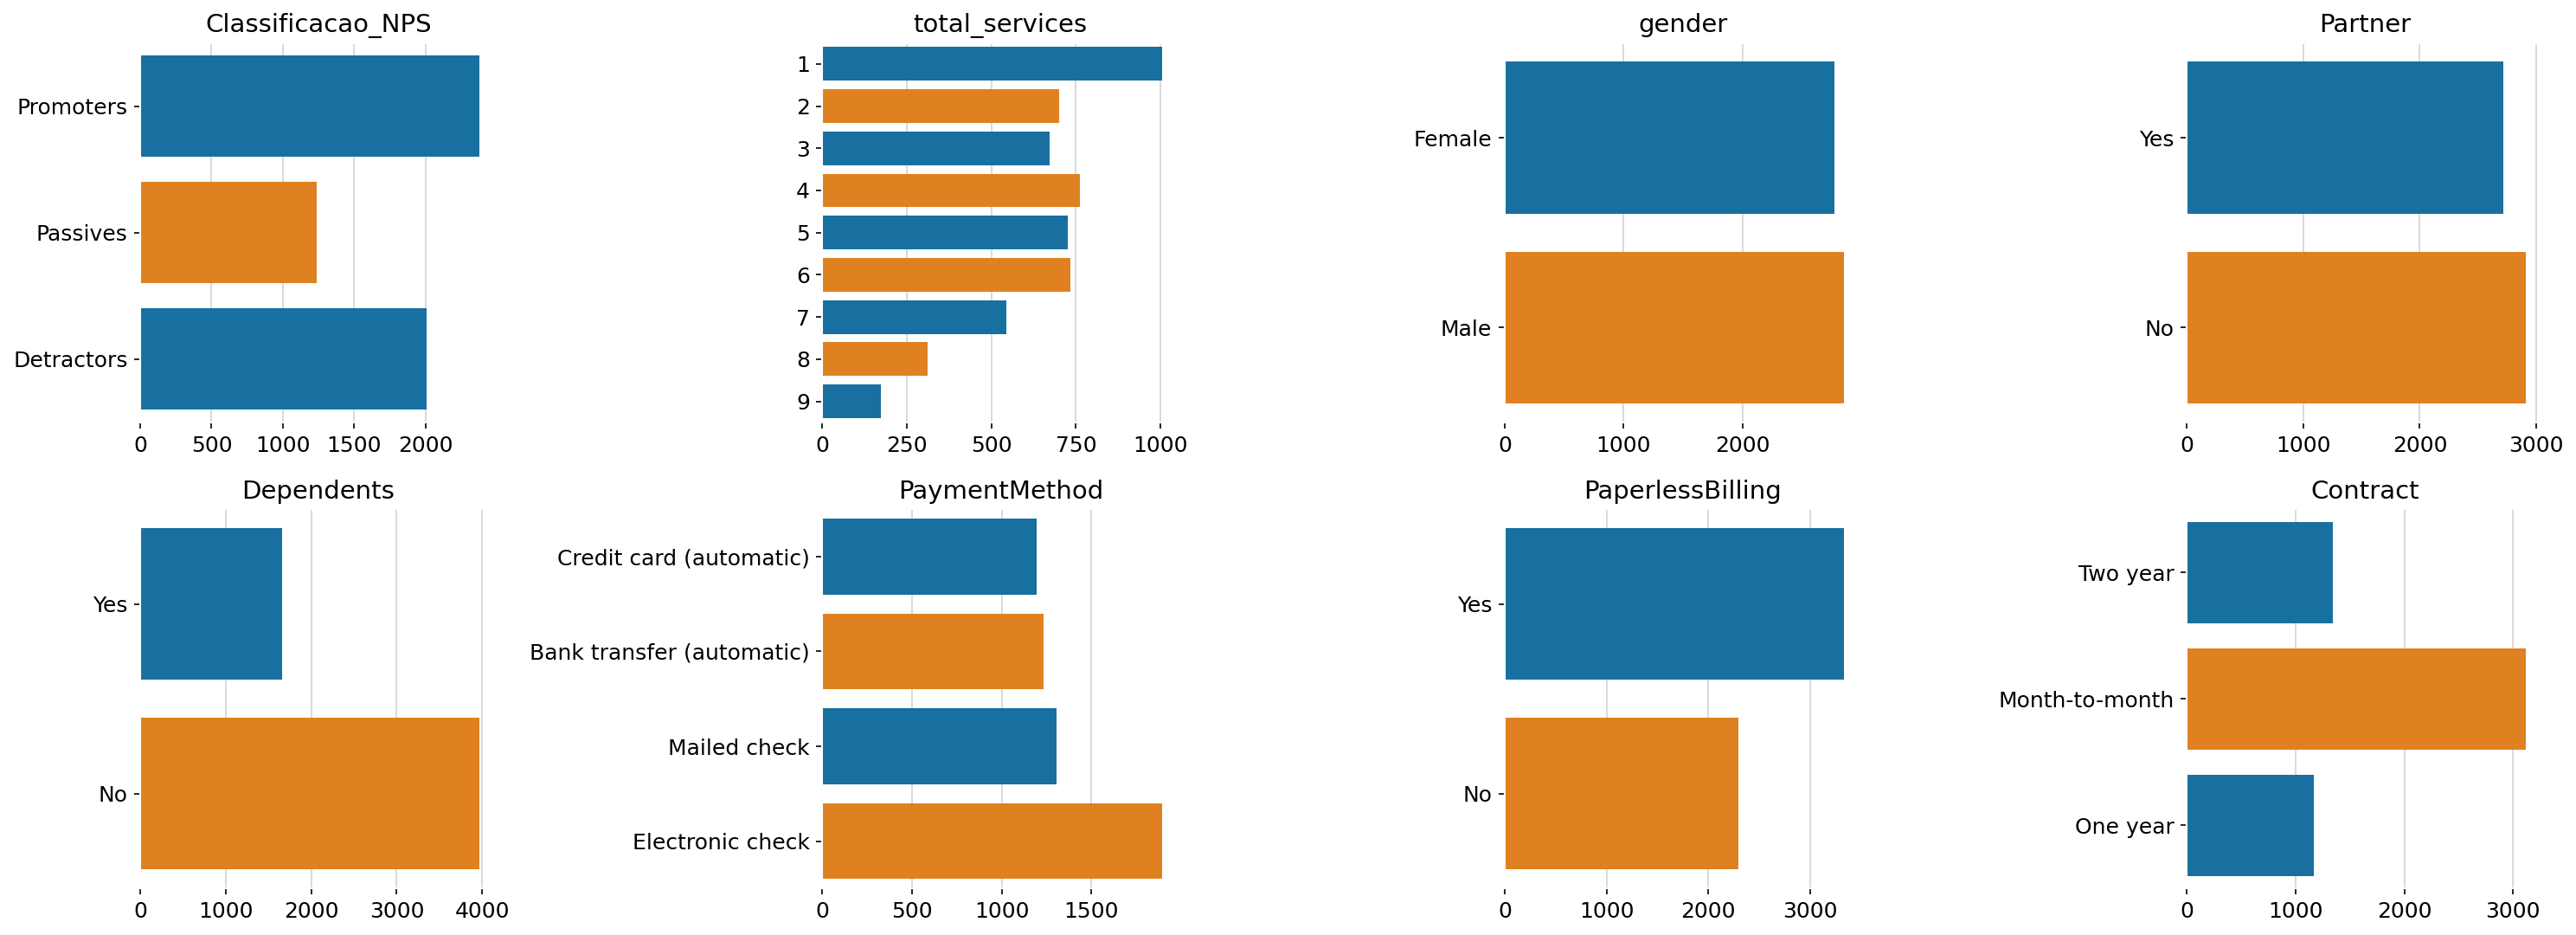

In [28]:
# Lista de variáveis para o Grupo 1
group1_vars = ['Classificacao_NPS', 'total_services', 'gender', 'Partner',
               'Dependents', 'PaymentMethod', 'PaperlessBilling', 'Contract']

# Criação da figura e eixos (2 linhas, 4 colunas)
fig1, axes1 = plt.subplots(2, 4, figsize=(20, 8)) # sharex=True removed as it might not be appropriate for different categorical variables
axes1 = axes1.flatten()

for i, var_name in enumerate(group1_vars): # Change loop to iterate over group1_vars
    # Corrected the extra comma in the sns.countplot call
    sns.countplot(y=var_name, data=df_train, ax=axes1[i], palette=palette_group1)
    axes1[i].set_title(var_name, fontsize=14)
    axes1[i].set_ylabel('')
    axes1[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o supertítulo
plt.show()

Grupo Serviço Telefonia

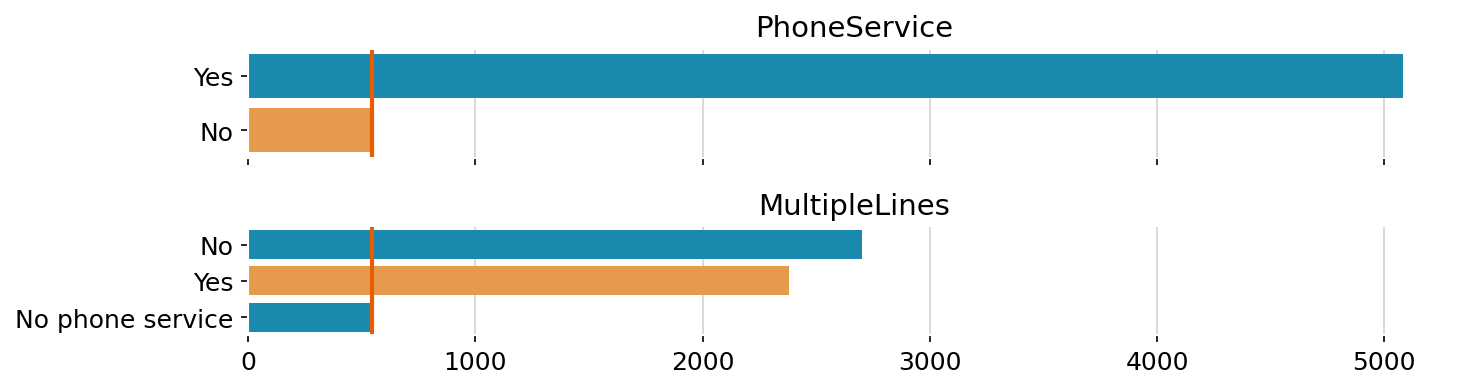

In [29]:
# Cálculo para as linhas de referência
No_Phone_Serv = df_train['PhoneService'].value_counts().loc['No']
group2_vars = ['PhoneService', 'MultipleLines']

fig2, axes2 = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
axes2 = axes2.flatten()

for i, var_name in enumerate(group2_vars):
    sns.countplot(y=var_name, data=df_train, ax=axes2[i], palette=palette_group2)
    axes2[i].axvline(x=No_Phone_Serv, linewidth=2, color=color_palette[1])
    axes2[i].set_title(var_name, fontsize=14)
    axes2[i].set_ylabel('')
    axes2[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [30]:
pd.crosstab(df_train['PhoneService'],df_train['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,544,0
Yes,2702,0,2381


Grupo Serviço de Internet

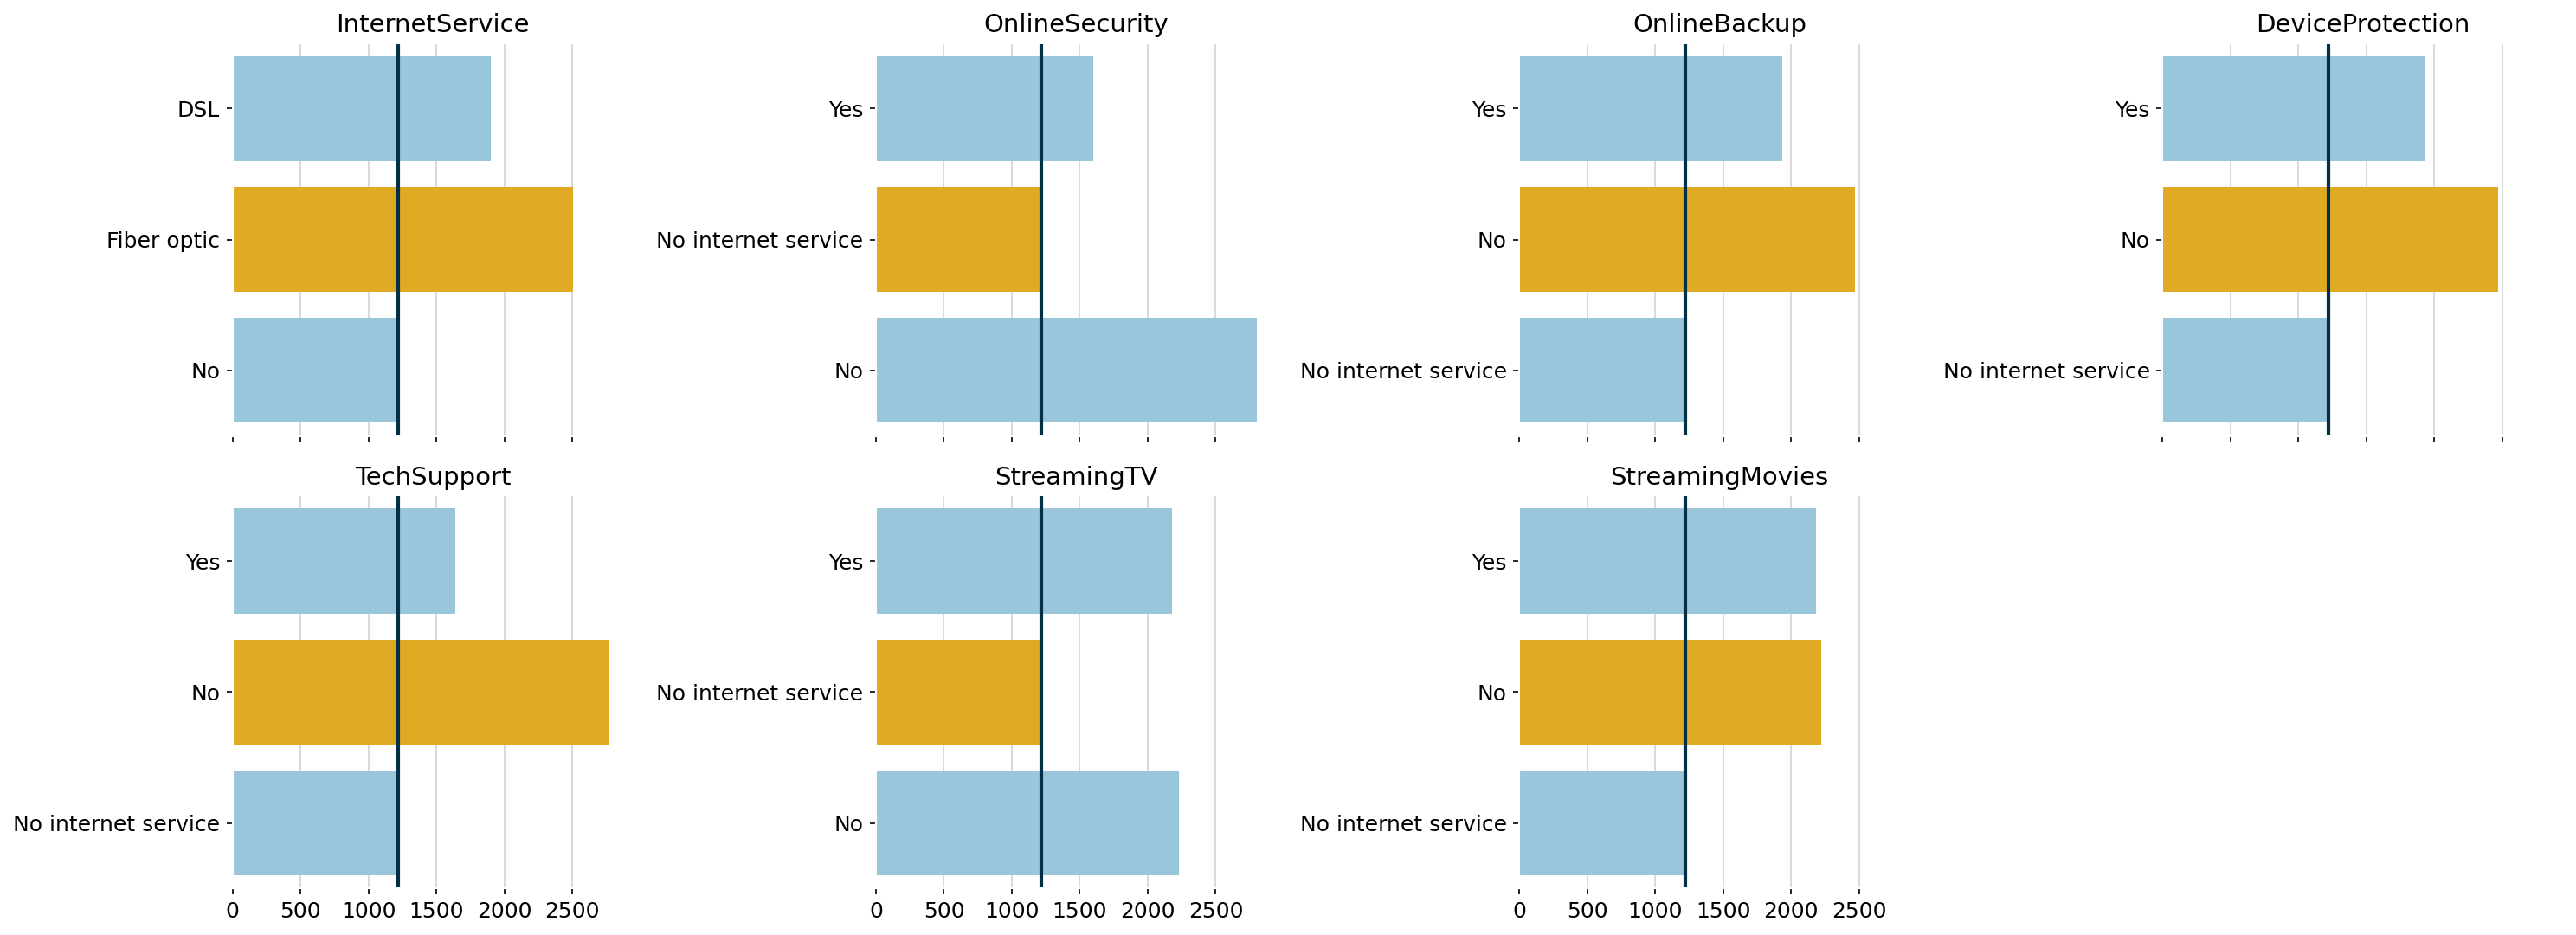

In [31]:
# Cálculo para as linhas de referência
No_Int_Serv = df_train['InternetService'].value_counts().loc['No']
group3_vars = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']

fig3, axes3 = plt.subplots(2, 4, figsize=(20, 8), sharex=True)
axes3 = axes3.flatten()

for i, var_name in enumerate(group3_vars):
    sns.countplot(y=var_name, data=df_train, ax=axes3[i], palette=palette_group3)
    axes3[i].axvline(x=No_Int_Serv, linewidth=2, color=color_palette[0])
    axes3[i].set_title(var_name, fontsize=14)
    axes3[i].set_ylabel('')
    axes3[i].set_xlabel('')

# Oculta o último eixo que não foi usado
fig3.delaxes(axes3[7])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Bivariate and multivariate analysis**

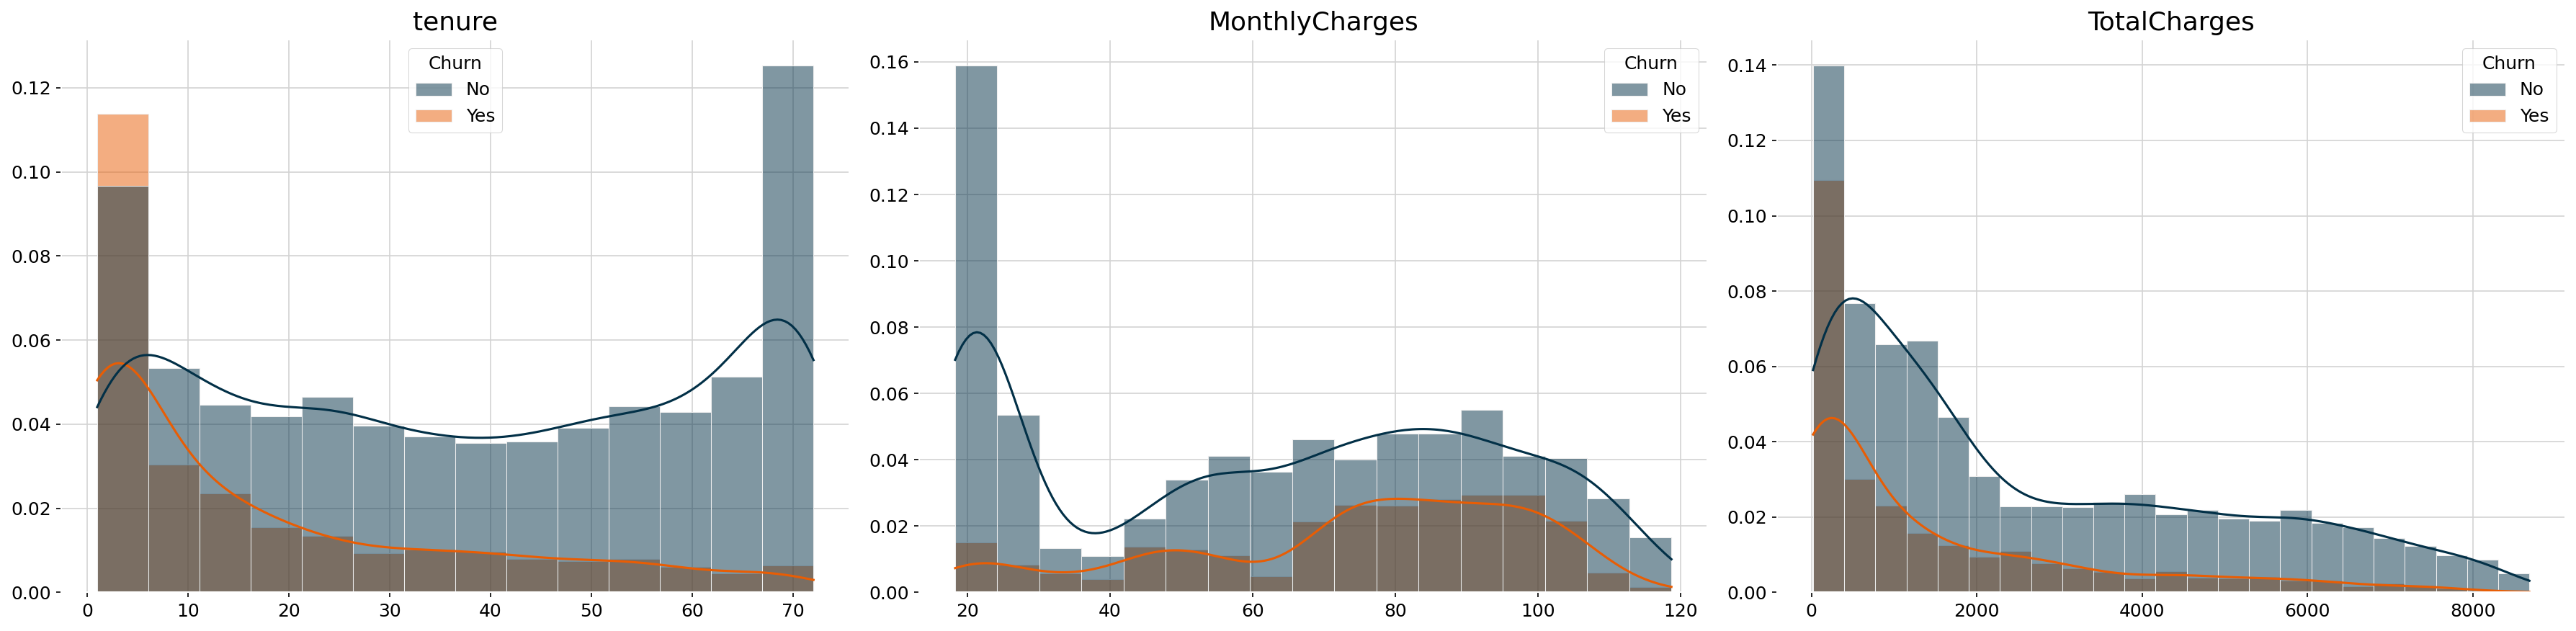

In [32]:
analysis_plots(data=df_train, features=numerical_features, histplot=True, kde=True, hue=target, figsize=(24, 6))

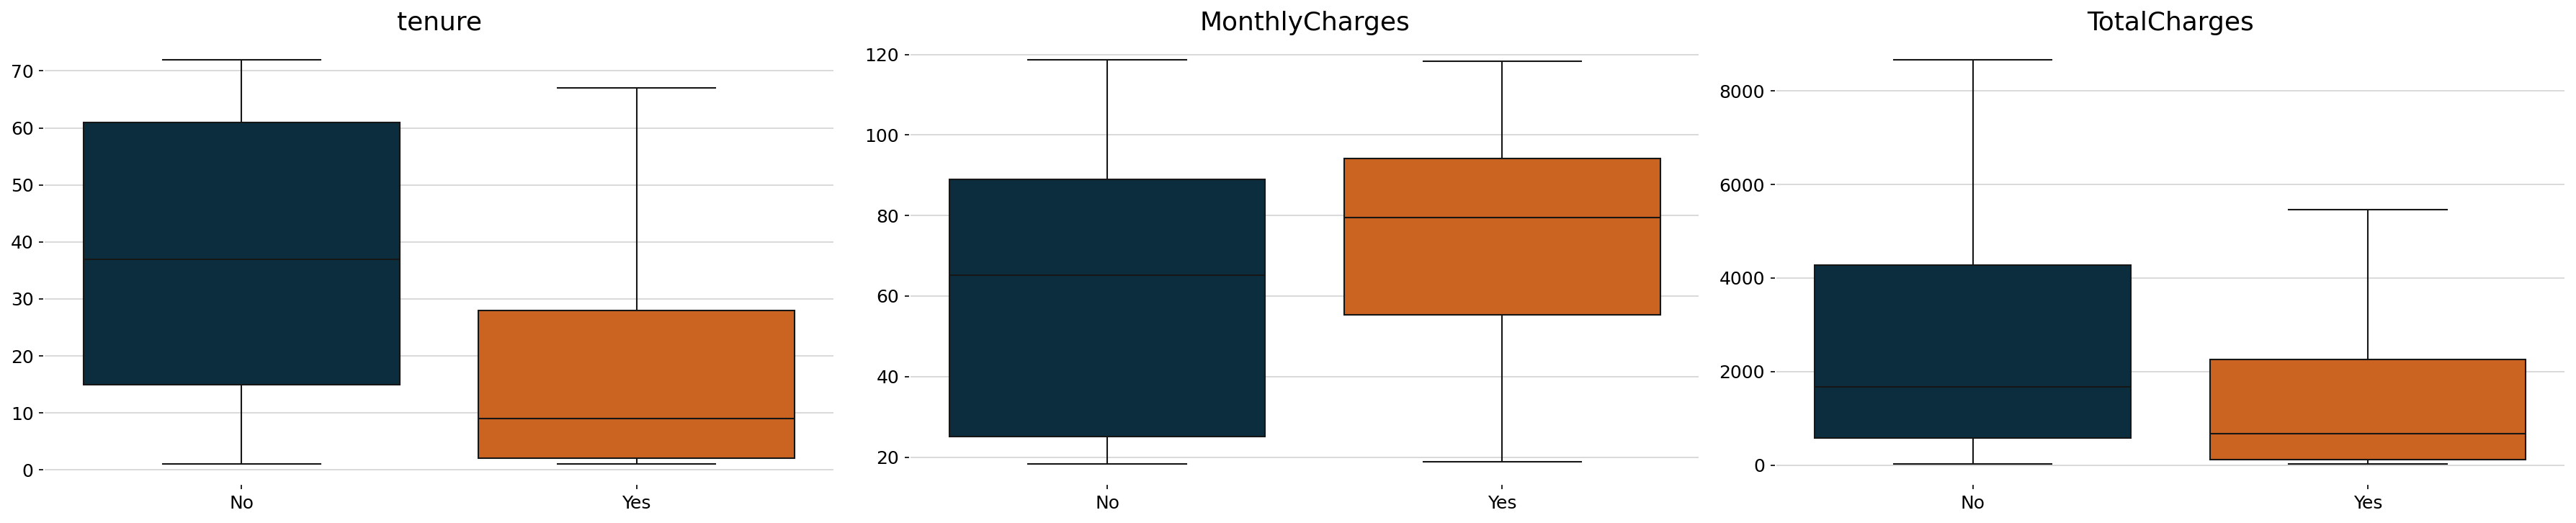

In [33]:
analysis_plots(data=df_train, features=numerical_features, boxplot=True, 
               boxplot_x=target, figsize=(24, 5), palette=palette_Churn
)

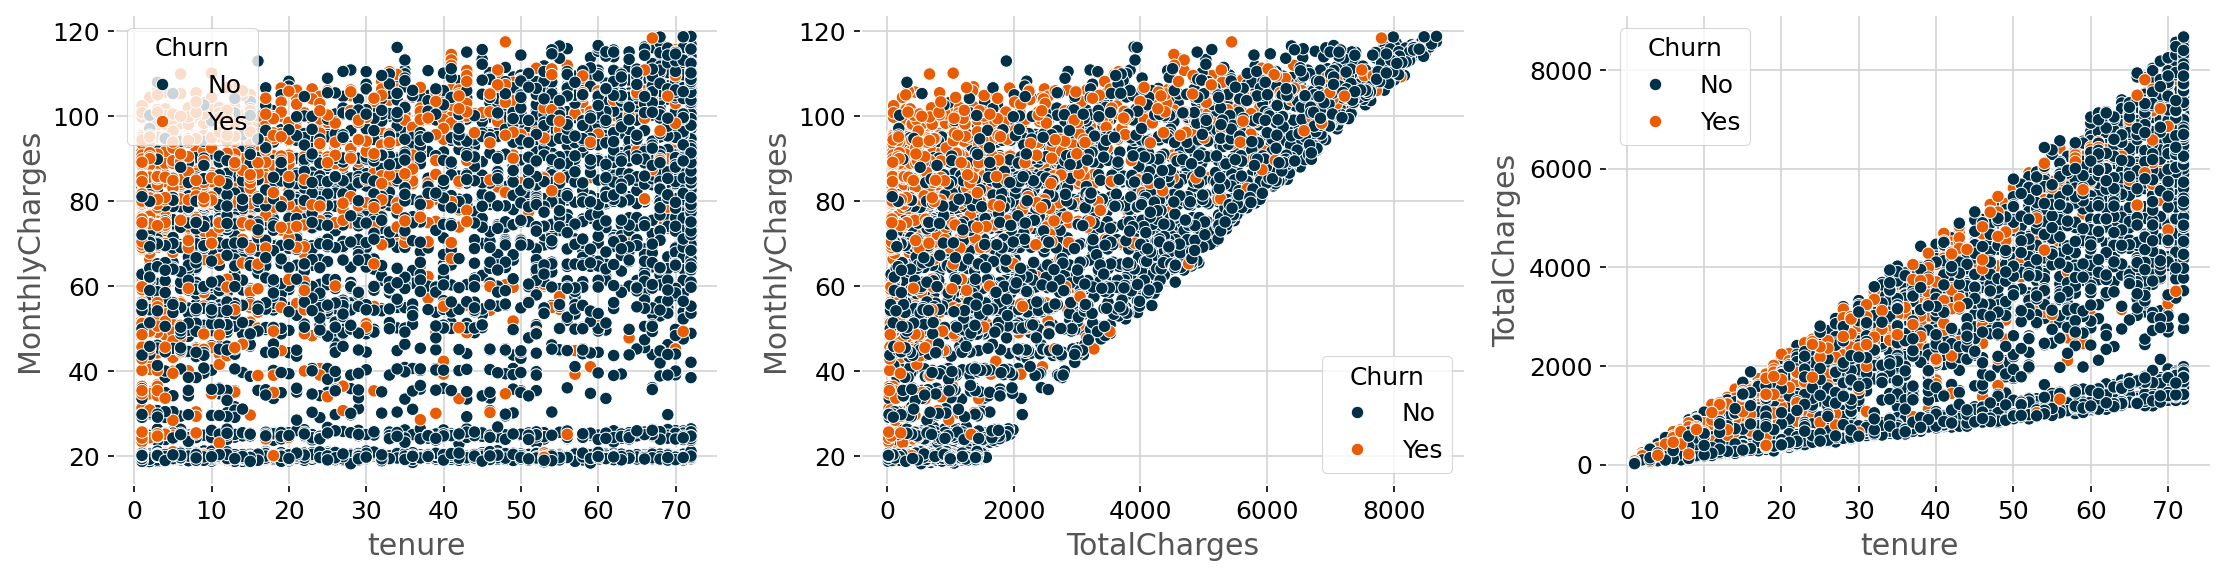

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(data=df_train, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[0])
sns.scatterplot(data=df_train, x='TotalCharges', y='MonthlyCharges', hue='Churn', ax=axes[1])
sns.scatterplot(data=df_train, x='tenure', y='TotalCharges', hue='Churn', ax=axes[2])

plt.tight_layout()
plt.show()

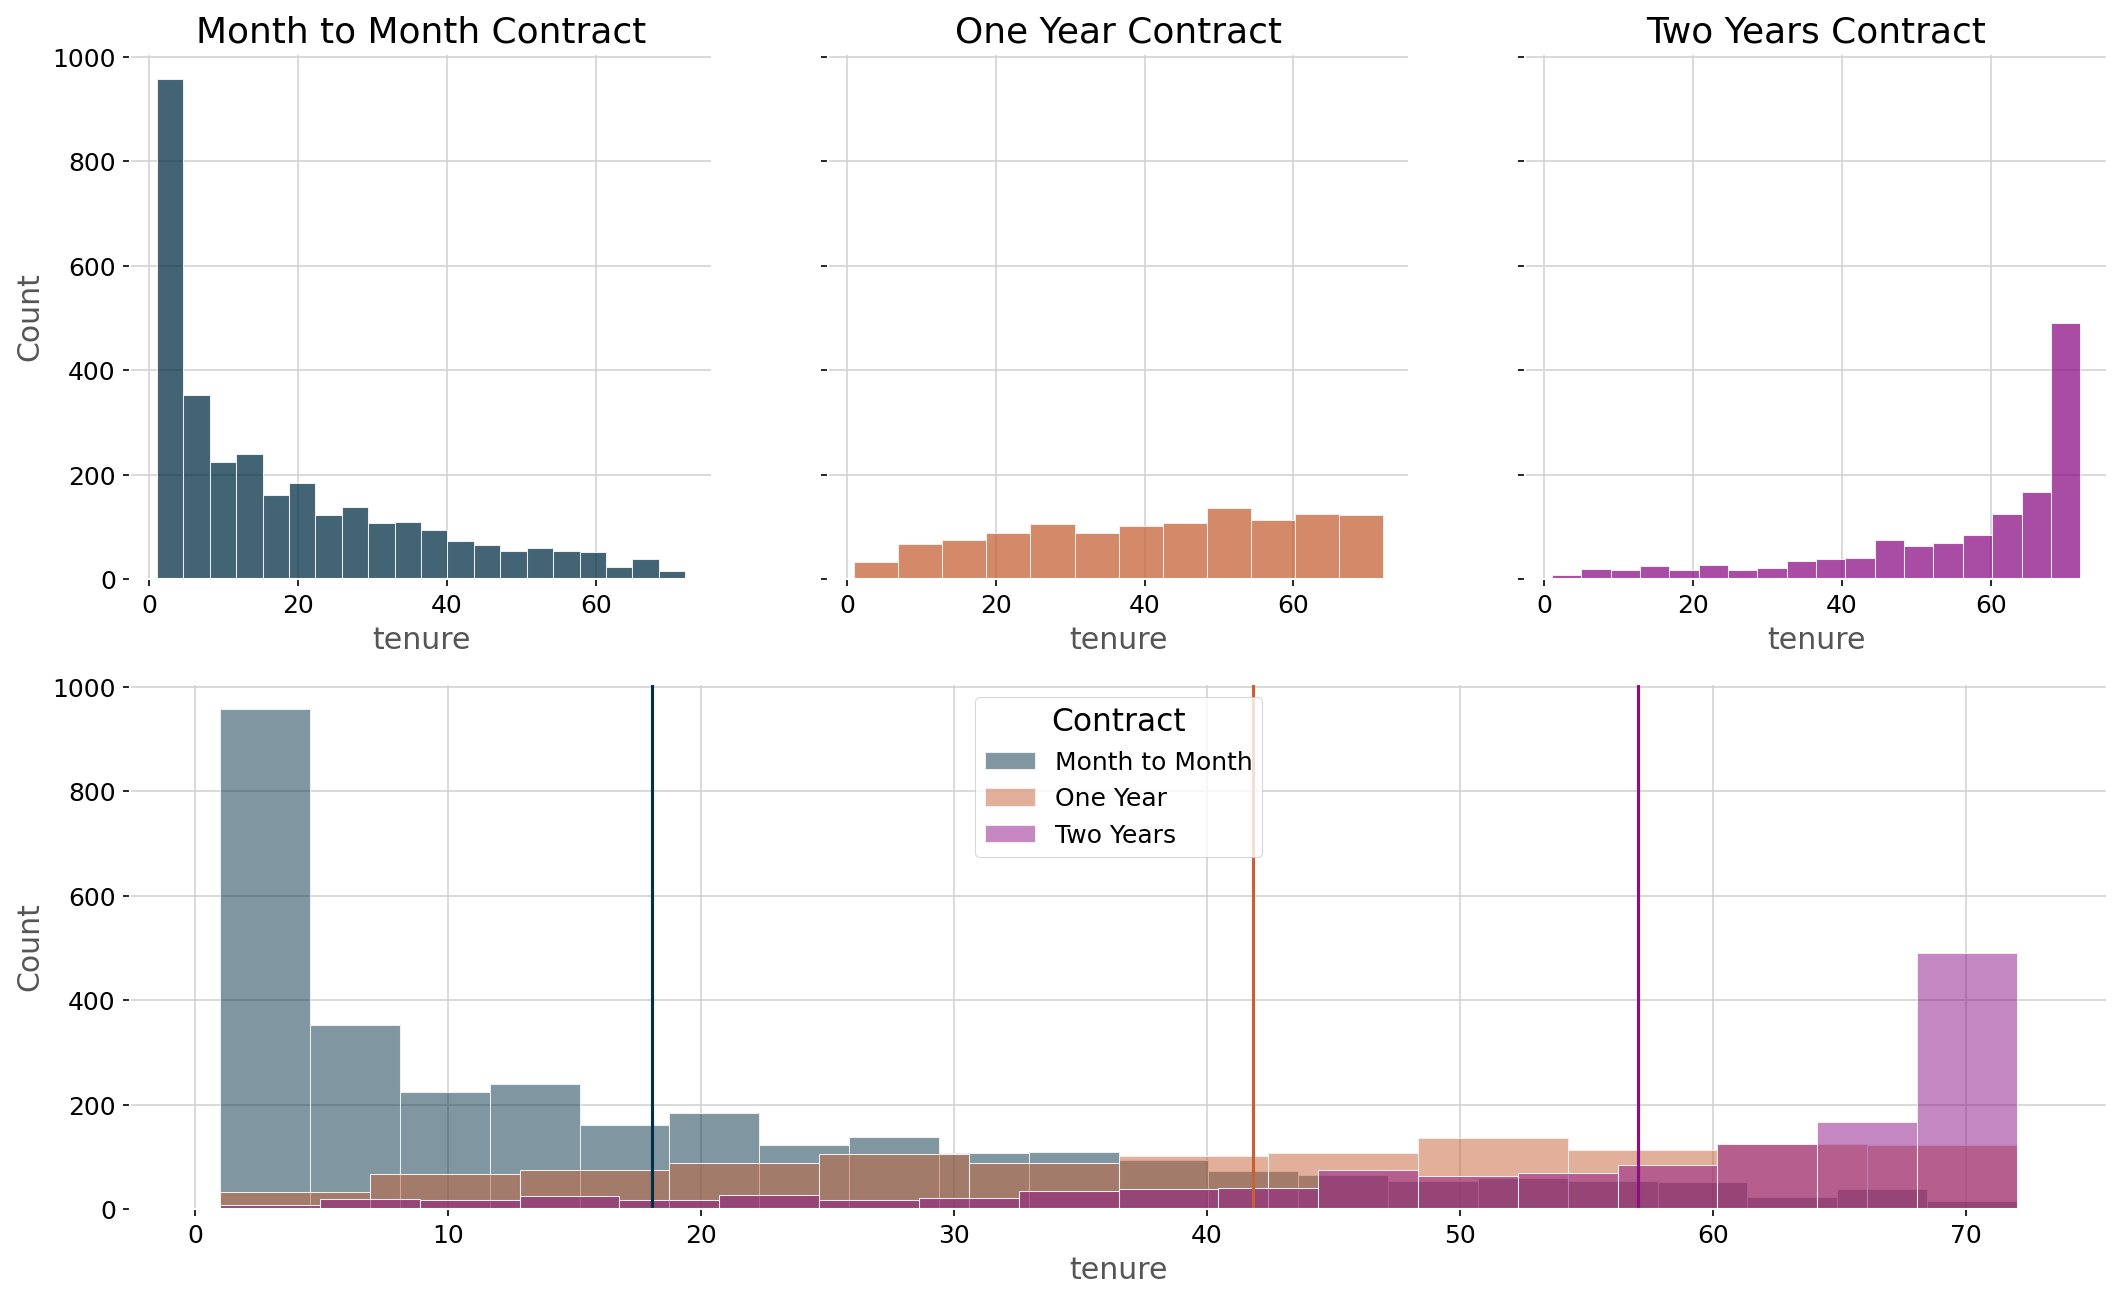

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10), sharey=True)
gs = axes[0, 1].get_gridspec()
for ax in axes[1, :3]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :3])

sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'Month-to-month'], ax=axes[0, 0])
axes[0, 0].set_title('Month to Month Contract')
sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'One year'], ax=axes[0, 1], color="#C66136")
axes[0, 1].set_title('One Year Contract')
sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'Two year'], ax=axes[0, 2], color="#8C1084")
axes[0, 2].set_title('Two Years Contract')

MtM_mean = df_train[df_train['Contract'] == 'Month-to-month']['tenure'].mean()
OY_mean = df_train[df_train['Contract'] == 'One year']['tenure'].mean()
TY_mean = df_train[df_train['Contract'] == 'Two year']['tenure'].mean()

sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'Month-to-month'], ax=axbig, alpha=0.5, label='Month to Month')
sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'One year'], ax=axbig, color="#C66136", alpha=0.5, label='One Year')
sns.histplot(x='tenure', data=df_train[df_train['Contract'] == 'Two year'], ax=axbig, color="#8C1084", alpha=0.5, label='Two Years')
axbig.legend(loc=9, fontsize=12, title="Contract", title_fontsize=15)
plt.axvline(x=MtM_mean)
plt.axvline(x=OY_mean, color="#C66136")
plt.axvline(x=TY_mean, color="#8C1084")

# Para exibir o gráfico
plt.show()

Gráfico 'gender' salvo em: ../reports/figures/gender_barplot.png
Gráfico 'SeniorCitizen' salvo em: ../reports/figures/SeniorCitizen_barplot.png
Gráfico 'Partner' salvo em: ../reports/figures/Partner_barplot.png
Gráfico 'Dependents' salvo em: ../reports/figures/Dependents_barplot.png
Gráfico 'PhoneService' salvo em: ../reports/figures/PhoneService_barplot.png
Gráfico 'MultipleLines' salvo em: ../reports/figures/MultipleLines_barplot.png
Gráfico 'InternetService' salvo em: ../reports/figures/InternetService_barplot.png
Gráfico 'OnlineSecurity' salvo em: ../reports/figures/OnlineSecurity_barplot.png
Gráfico 'OnlineBackup' salvo em: ../reports/figures/OnlineBackup_barplot.png
Gráfico 'DeviceProtection' salvo em: ../reports/figures/DeviceProtection_barplot.png
Gráfico 'TechSupport' salvo em: ../reports/figures/TechSupport_barplot.png
Gráfico 'StreamingTV' salvo em: ../reports/figures/StreamingTV_barplot.png
Gráfico 'StreamingMovies' salvo em: ../reports/figures/StreamingMovies_barplot.png
G

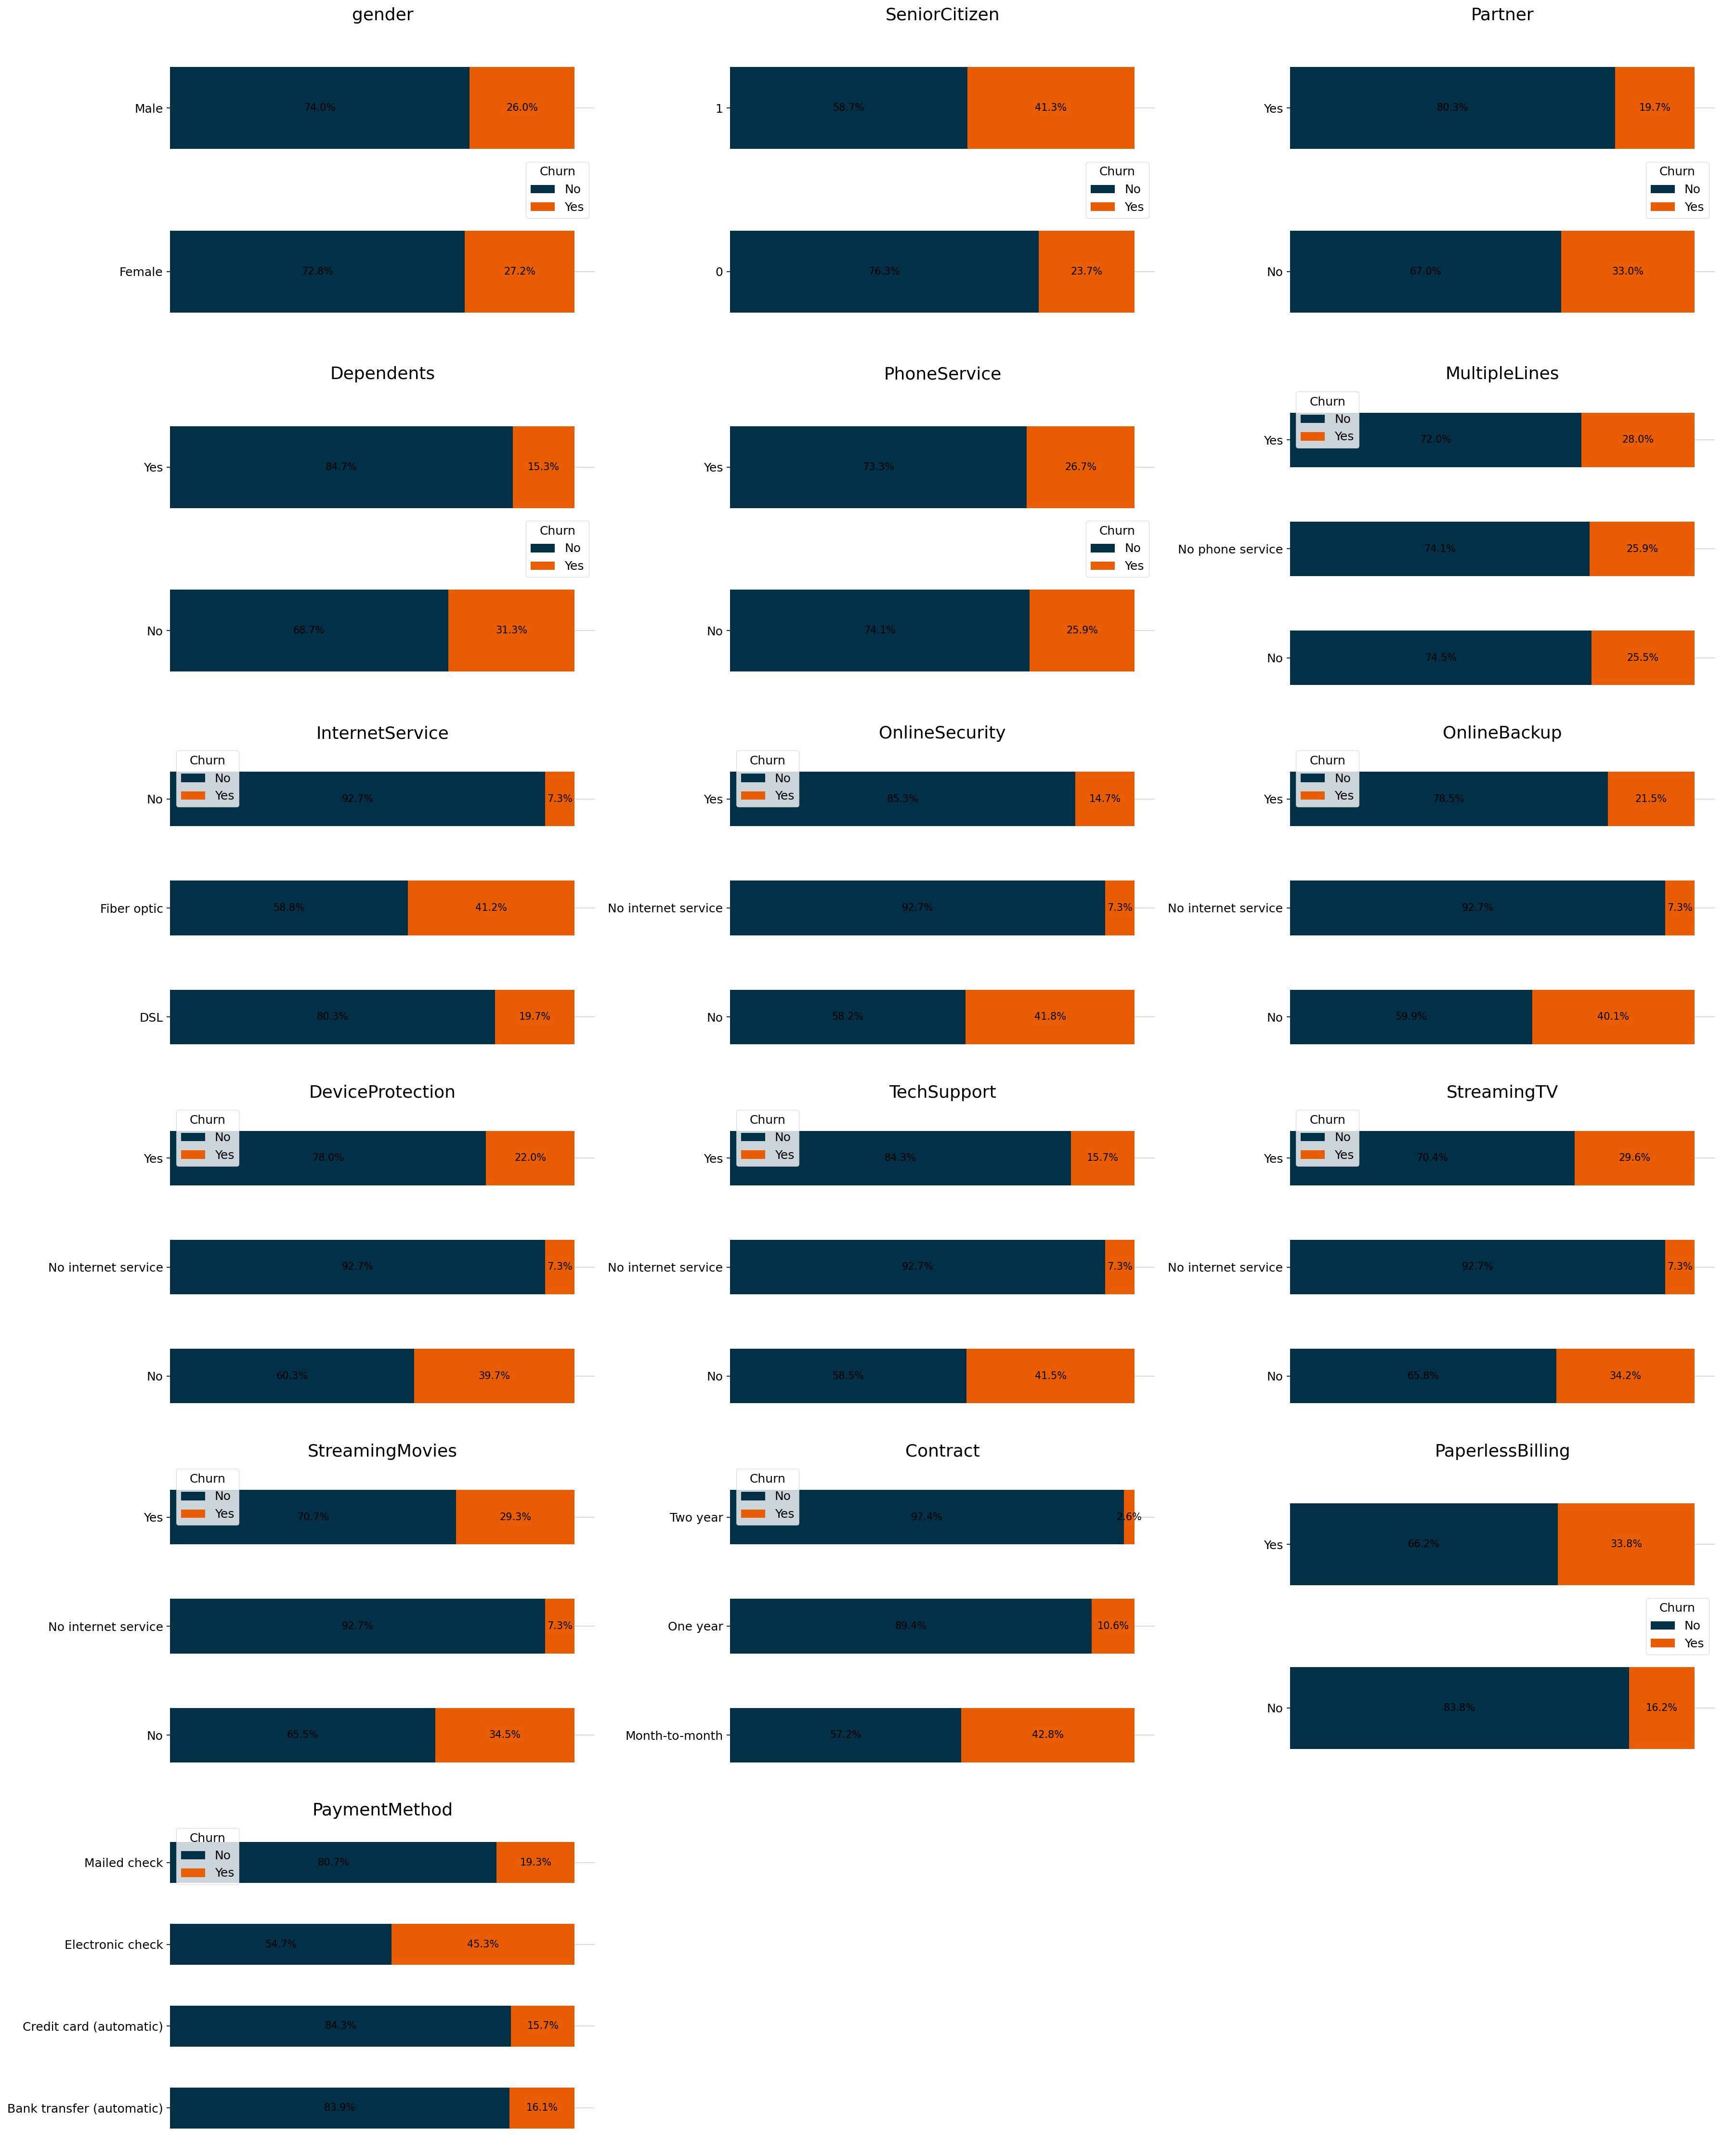

In [36]:
analysis_plots(data=df_train, features=categorical_features, barplot=True, figsize=(24, 30), hue=target, text_y=0.1, save_separate_files=True, save_path='../reports/figures/')